In [298]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plotTools,syst_tools
from wremnants import histselections as sel
import hist
import narf
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [168]:
groups = datagroups2016("../mw_with_mu_eta_pt.pkl.lz4")

In [233]:
procDict = groups.datagroupsForHist("nominal", label="nominal")

Shapes are (50, 31, 2) (50, 31, 2)


In [364]:
combine = datagroups2016("../temp/WMassCombineInput.root")

In [371]:
procs = combine.datagroupsForHist("x_Wmunu_plus", label="nominal")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Up_plus", label="scaleEta0Up")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Down_plus", label="scaleEta0Down")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f79720da6b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

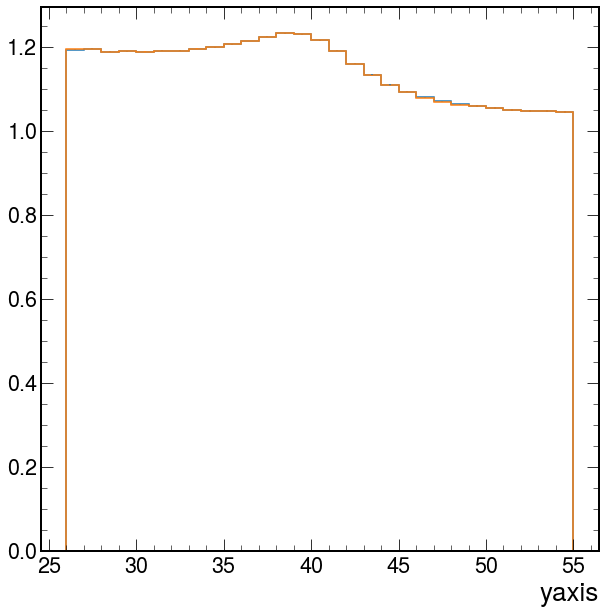

In [373]:
hh.divideHists(procs["Wmunu"]["scaleEta0Up"].project(1), procs["Wmunu"]["nominal"].project(1)).plot()
hh.divideHists(procs["Wmunu"]["scaleEta0Down"].project(1), procs["Wmunu"]["nominal"].project(1)).plot()
#plt.ylim([0.99, 1.01])

In [260]:
hnom = procs["Wmunu"]["nominal"][{"zaxis" : 1}]
hmirror = hh.mirrorHist(hnom, procs["Wmunu"]["pdf2Up"][{"zaxis" : 1}])

Shapes are (50, 31) (50, 31)
hnew is WeightedSum(value=2.64658e+08, variance=-nan)


Shapes are (31,) (31,)
Shapes are (31,) (31,)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f797559c3d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

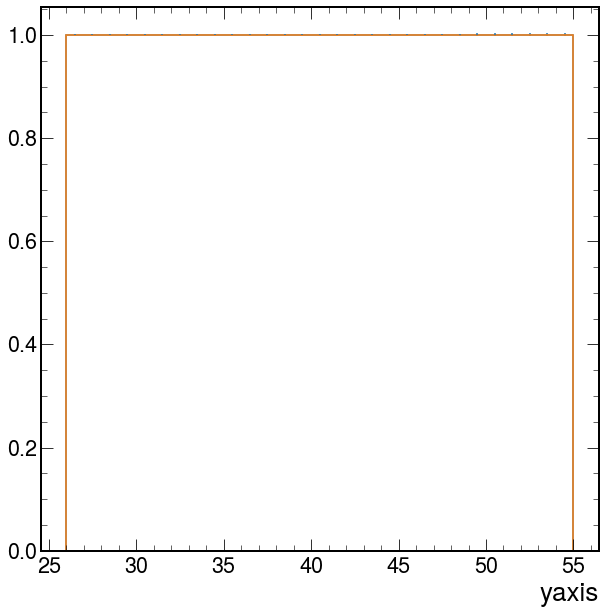

In [361]:
hh.divideHists(procs["Wmunu"]["pdf2Up"].project("yaxis"),procs["Wmunu"]["nominal"].project("yaxis")).plot()
hh.divideHists(procs["Wmunu"]["pdf2Down"].project("yaxis"),procs["Wmunu"]["nominal"].project("yaxis")).plot()
#plt.ylim([0.95, 1.05])

In [59]:
#procs["Wmunu"]["pdf2Down"].project("yaxis").values()/procs["Wmunu"]["nominal"].project("yaxis").values()
procs["Wmunu"]["pdf2Up"].project("yaxis").values()

array([ 6294138.43827478,  6850797.55157714,  7458147.95066476,
        8014015.37313849,  8589486.90107885,  9149725.31105179,
        9737237.69451388, 10316357.44247185, 10896391.35965926,
       11437761.00198694, 11899207.44614102, 12161344.69561444,
       12021756.74196053, 11303275.59464832, 10004937.55585582,
        8393849.8965631 ,  6855058.09897667,  5579791.93258481,
        4585916.97202967,  3830935.59539094,  3256218.62976126,
        2797196.10705118,  2436334.31037682,  2136914.81207355,
        1885529.35507566,  1682760.89036902,  1504877.40730026,
        1352653.83623017,  1223305.53261242])

In [39]:
v = procs["Wmunu"]["pdf2Down"].sum()

In [27]:
histInfo = groups.datagroupsForHist("nominal", selectSignal=True, label="nominal")
#histInfo = groups.datagroupsForHist("muonScaleSyst", selectSignal=True, label="muonScaleSyst", procsToRead=["Wmunu"])

NameError: name 'groups' is not defined

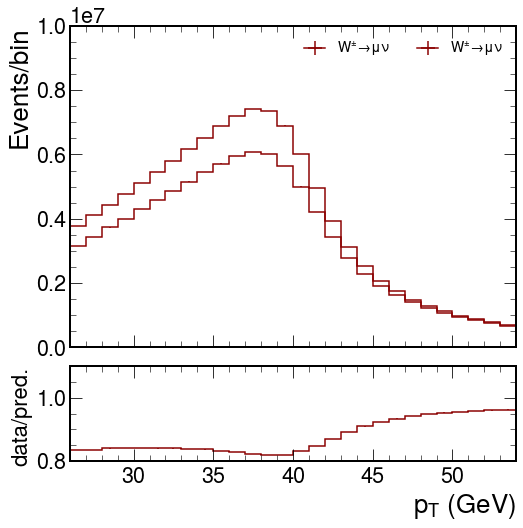

In [36]:
selections = {"downUpVar" : 1, "scaleEtaSlice" : 2.j}
fig = plotTools.makePlotsWithRatioToRef("pt", histInfo, ["Wmunu"], label="muonScaleSyst", selection=selection, referenceProc="Wmunu", referenceHist="nominal", xlabel=r"p$_{T}$ (GeV)", scale=1e7,rrange=[0.8, 1.1])


In [117]:
histInfo = groups.datagroupsForHist("qcdScaleByHelicity", selectSignal=True, label="qcdScaleByHelicity", procsToRead=["Wmunu"])


In [118]:
histInfo["Wmunu"]["qcdScaleByHelicity"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Variable([0, 2, 3, 4, 4.75, 5.5, 6.5, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=1.08782e+09, variance=7.30257e+13)

In [120]:
histInfo["Wmunu"]["qcdScaleByHelicitySum"] = syst_tools.scale_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"])

In [166]:
s = hist.tag.Slicer()
hVarNom = histInfo["Wmunu"]["qcdScaleByHelicity"][{"ptVgen" : s[::hist.sum], "chargeVgen" : s[::hist.sum], "helicity" : s[::hist.sum], "muRfact" : s[1.j], "muFfact" : s[1.j] }]


In [148]:
selections = [{"muRfact" : j, "muFfact" : j, "helicity" : i, "ptVgen" : 0, "chargeVgen" : 0} for i in range(2) for j in [0,1,2]]

In [199]:
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.append(sel.unrolledHist(hVarNom))
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicitySum"][s]) for s in selections])

In [168]:
len(hists)

8

In [164]:
labels = ["nominal", "varNom","sumNom"]+["test%i" % i for i in range(5)]
colors = ["black", "blue", "red", "lightgreen", "green", "pink", "orange", "lightblue"]

In [144]:
hists[1].sum()

WeightedSum(value=1.03086e+08, variance=2.42884e+12)

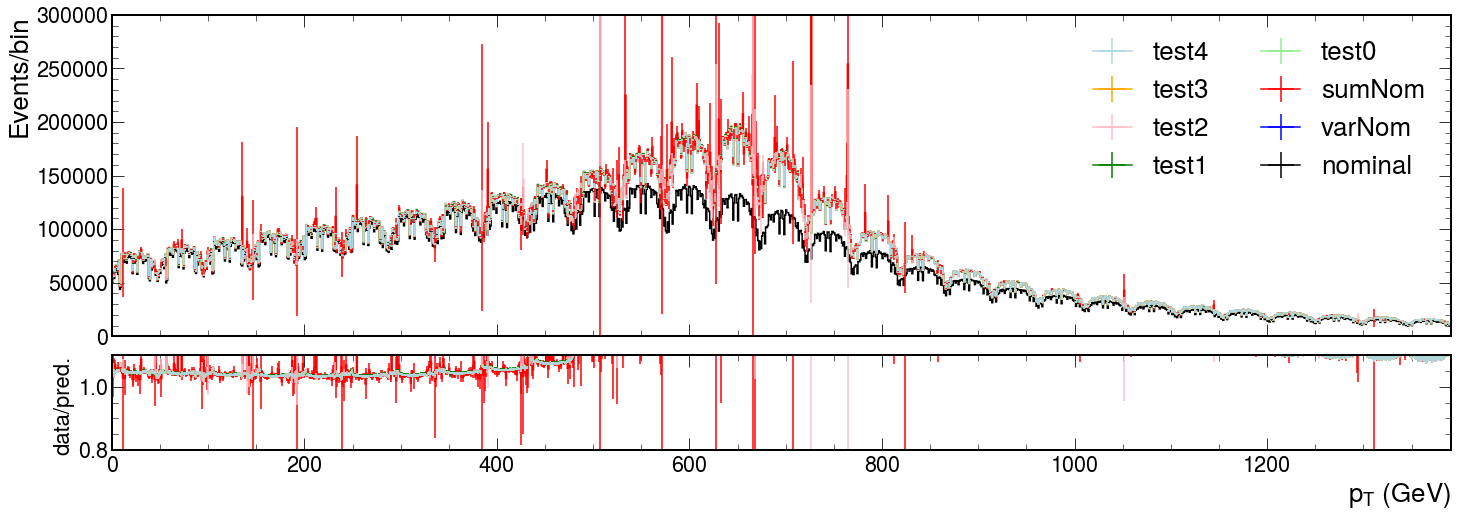

In [206]:
fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"p$_{T}$ (GeV)", scale=3e5,rrange=[0.8, 1.1])

In [189]:
print(histInfo["Wmunu"]["nominal"].sum(flow=True))
print(histInfo["Wmunu"]["qcdScaleByHelicity"][{"muRfact" :1.j, "muFfact" : 1.j}].sum(flow=True))

WeightedSum(value=9.68424e+07, variance=7.6705e+07)
WeightedSum(value=1.12406e+08, variance=1.33627e+08)


In [179]:
histInfo["Wmunu"]["qcdScaleByHelicity"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Variable([0, 2, 3, 4, 4.75, 5.5, 6.5, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=1.08782e+09, variance=7.30257e+13)